# Mixers and Down-Converters

As discussed in class, __mixing__ is a fancy name for multiplying analog signals. Here, we consider the specific (and useful) case where one of those signals is a (real or complex) sinusoid.

For the special case of multiplying a signal by a complex sinusoid, we can understand the effect on the resulting spectrum using the __convolution theorem__:
\begin{equation}
\widetilde{\left[f(t)\cdot e^{-i\omega_0 t}\right]} = \tilde f(\omega) * \delta(\omega-\omega_0),
\end{equation}
where we use explicitly that the Fourier transform (denoted as a tilde) of $e^{-i\omega_0t}$ is a delta
function centered at $-\omega_0$. Moreover, since convolving a function with a delta function effectively
shifts the function, we can write the above as
\begin{equation}
\widetilde{\left[f(t)\cdot e^{-i\omega_0 t}\right]} = \tilde f(\omega-\omega_0),
\end{equation}
which amounts to shifting the spectrum of a signal.

This spectrum-shifting use of mixing is what we explore below.

## Simulation 1: Mixing a Complex Function with a Complex Sinusoid


In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, FloatSlider, Layout

<IPython.core.display.Javascript object>


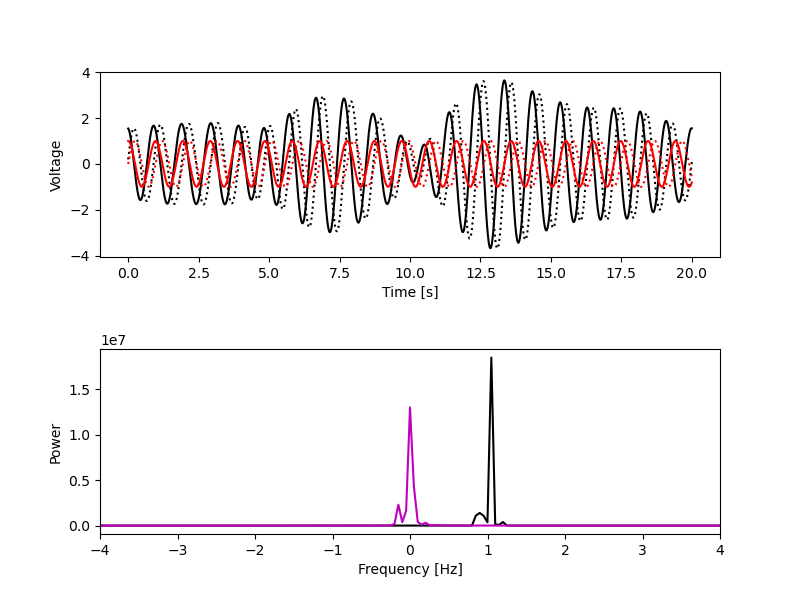

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


interactive(children=(FloatSlider(value=0.5, description='Mixer Frequency', layout=Layout(grid_area='footer', …

In [4]:
# SIMULATION PARAMETERS
CENTER_FQ = 1 # Hz, center of Gaussian spectrum
DELTA_FQ = 0.1 # Hz, width of Gaussian spectrum
NSAMPLES = 2048

TIMES = np.linspace(0, 20, NSAMPLES)
FREQS = np.fft.fftfreq(TIMES.size, np.median(np.diff(TIMES)))

# Populate a frequency spectrum with random complex noise
_f = np.random.normal(size=FREQS.size) + 1j * np.random.normal(size=FREQS.size)
_f *= NSAMPLES * np.exp(-(FREQS-CENTER_FQ)**2 / (2*DELTA_FQ**2)) # bandpass to create Gaussian bandpass shape
f = np.fft.ifft(_f)

lo_initial = 0.5

fig, (ax1,ax2) = plt.subplots(2, figsize=(8,6))
fig.subplots_adjust(hspace=0.5)
ax1.plot(TIMES, f.real, 'k-', label='f')
ax1.plot(TIMES, f.imag, 'k:', label='f')
lor_line, = ax1.plot(TIMES, np.zeros_like(TIMES), 'r-')
loi_line, = ax1.plot(TIMES, np.zeros_like(TIMES), 'r:')
ax2.plot(np.fft.fftshift(FREQS), np.fft.fftshift(np.abs(_f)**2), 'k-')
#lo_line, = ax2.vlines([lo_initial], 'r-')
mix_line, = ax2.plot(np.fft.fftshift(FREQS), np.zeros_like(_f), 'm-')

# Slider controlling offset
lo_widget = FloatSlider(lo_initial, min=-2, max=2, step=0.01, 
                         description='Mixer Frequency',
                         style={'description_width':'initial'},
                         layout=Layout(width='auto', grid_area='footer'))

def update(lo):
    '''Update plots for each line according to the time step. Reads dt 
    from dt_widget.'''
    lo_data = np.exp(2j*np.pi*lo*TIMES)
    lor_line.set_ydata(lo_data.real)
    loi_line.set_ydata(lo_data.imag)
    mix_data = f * np.conj(lo_data)
    _mix = np.fft.fft(mix_data)
    mix_line.set_ydata(np.fft.fftshift(np.abs(_mix)**2))
    #lo_line.set_
    
def init(ax1, ax2):
    '''Set initial plot parameters.'''
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Voltage')
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Power')
    #ax1.set_xlim(TMIN, TMAX)
    ax2.set_xlim(-4, 4)
    #ax1.set_ylim(-1.5, 1.5)
    #ax1.set_title('Convolution')
    #ax1.legend(loc='upper right')
    #ax2.legend(loc='upper right')
    #ax1.grid(True)
    #ax2.grid(True)
    
init(ax1, ax2)
interact(update, lo=lo_widget)
plt.show()

# Simulation 2: Mixing a Real Function with a Complex Sinusoid

<IPython.core.display.Javascript object>


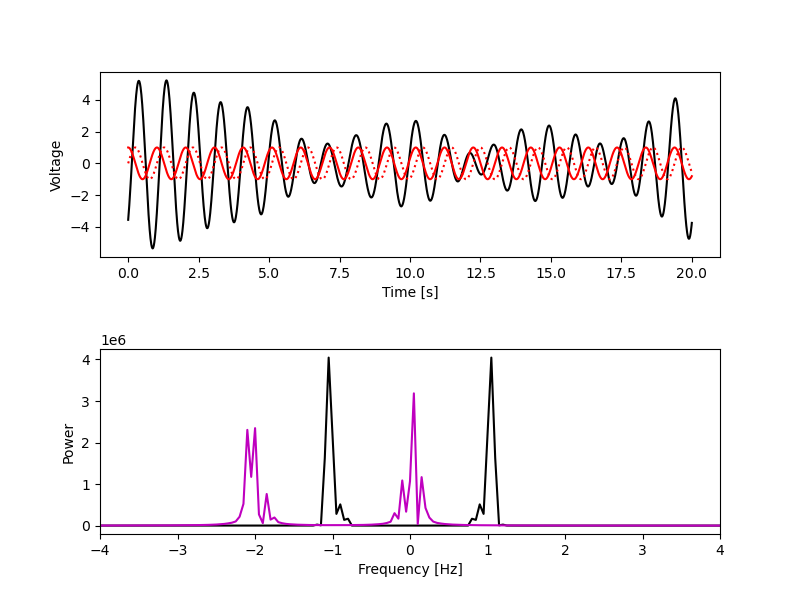

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


interactive(children=(FloatSlider(value=0.5, description='Mixer Frequency', layout=Layout(grid_area='footer', …

In [6]:
# SIMULATION PARAMETERS
CENTER_FQ = 1 # Hz, center of Gaussian spectrum
DELTA_FQ = 0.1 # Hz, width of Gaussian spectrum
NSAMPLES = 2048

TIMES = np.linspace(0, 20, NSAMPLES)
FREQS = np.fft.fftfreq(TIMES.size, np.median(np.diff(TIMES)))

# Populate a frequency spectrum with random complex noise
_f = np.random.normal(size=FREQS.size) + 1j * np.random.normal(size=FREQS.size)
_f *= NSAMPLES * np.exp(-(FREQS-CENTER_FQ)**2 / (2*DELTA_FQ**2)) # bandpass to create Gaussian bandpass shape
f = np.fft.ifft(_f)
f = f.real # make real
_f = np.fft.fft(f)

lo_initial = 0.5

fig, (ax1,ax2) = plt.subplots(2, figsize=(8,6))
fig.subplots_adjust(hspace=0.5)
ax1.plot(TIMES, f, 'k-', label='f')
lor_line, = ax1.plot(TIMES, np.zeros_like(TIMES), 'r-')
loi_line, = ax1.plot(TIMES, np.zeros_like(TIMES), 'r:')
ax2.plot(np.fft.fftshift(FREQS), np.fft.fftshift(np.abs(_f)**2), 'k-')
#lo_line, = ax2.vlines([lo_initial], 'r-')
mix_line, = ax2.plot(np.fft.fftshift(FREQS), np.zeros_like(_f), 'm-')

# Slider controlling offset
lo_widget = FloatSlider(lo_initial, min=-2, max=2, step=0.01, 
                         description='Mixer Frequency',
                         style={'description_width':'initial'},
                         layout=Layout(width='auto', grid_area='footer'))

def update(lo):
    '''Update plots for each line according to the time step. Reads dt 
    from dt_widget.'''
    lo_data = np.exp(2j*np.pi*lo*TIMES)
    lor_line.set_ydata(lo_data.real)
    loi_line.set_ydata(lo_data.imag)
    mix_data = f * np.conj(lo_data)
    _mix = np.fft.fft(mix_data)
    mix_line.set_ydata(np.fft.fftshift(np.abs(_mix)**2))
    #lo_line.set_
    
def init(ax1, ax2):
    '''Set initial plot parameters.'''
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Voltage')
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Power')
    #ax1.set_xlim(TMIN, TMAX)
    ax2.set_xlim(-4, 4)
    #ax1.set_ylim(-1.5, 1.5)
    #ax1.set_title('Convolution')
    #ax1.legend(loc='upper right')
    #ax2.legend(loc='upper right')
    #ax1.grid(True)
    #ax2.grid(True)
    
init(ax1, ax2)
interact(update, lo=lo_widget)
plt.show()

# Simulation 3: Mixing a Real Function with a Real Sinusoid

<IPython.core.display.Javascript object>


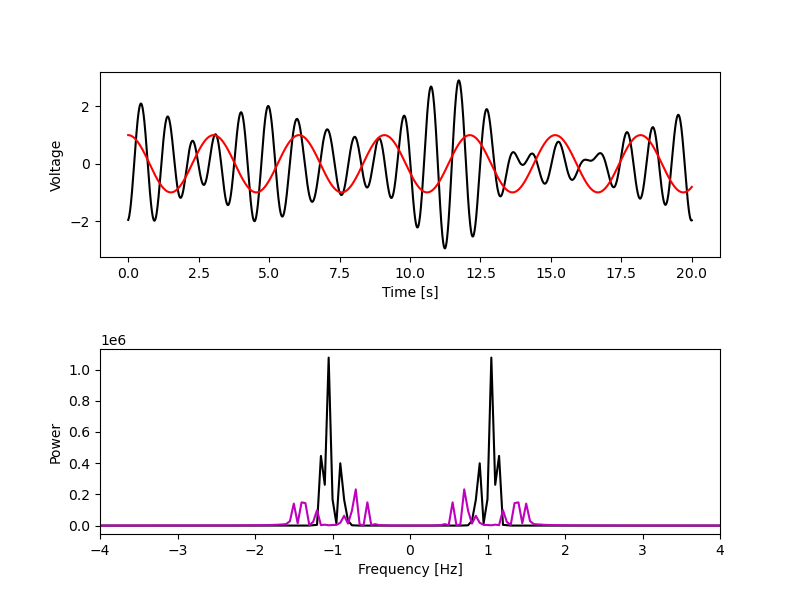

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


interactive(children=(FloatSlider(value=0.5, description='Mixer Frequency', layout=Layout(grid_area='footer', …

In [7]:
# SIMULATION PARAMETERS
CENTER_FQ = 1 # Hz, center of Gaussian spectrum
DELTA_FQ = 0.1 # Hz, width of Gaussian spectrum
NSAMPLES = 2048

TIMES = np.linspace(0, 20, NSAMPLES)
FREQS = np.fft.fftfreq(TIMES.size, np.median(np.diff(TIMES)))

# Populate a frequency spectrum with random complex noise
_f = np.random.normal(size=FREQS.size) + 1j * np.random.normal(size=FREQS.size)
_f *= NSAMPLES * np.exp(-(FREQS-CENTER_FQ)**2 / (2*DELTA_FQ**2)) # bandpass to create Gaussian bandpass shape
f = np.fft.ifft(_f)
f = f.real # make real
_f = np.fft.fft(f)

lo_initial = 0.5

fig, (ax1,ax2) = plt.subplots(2, figsize=(8,6))
fig.subplots_adjust(hspace=0.5)
ax1.plot(TIMES, f, 'k-', label='f')
lor_line, = ax1.plot(TIMES, np.zeros_like(TIMES), 'r-')
ax2.plot(np.fft.fftshift(FREQS), np.fft.fftshift(np.abs(_f)**2), 'k-')
#lo_line, = ax2.vlines([lo_initial], 'r-')
mix_line, = ax2.plot(np.fft.fftshift(FREQS), np.zeros_like(_f), 'm-')

# Slider controlling offset
lo_widget = FloatSlider(lo_initial, min=-2, max=2, step=0.01, 
                         description='Mixer Frequency',
                         style={'description_width':'initial'},
                         layout=Layout(width='auto', grid_area='footer'))

def update(lo):
    '''Update plots for each line according to the time step. Reads dt 
    from dt_widget.'''
    lo_data = np.cos(2*np.pi*lo*TIMES)
    lor_line.set_ydata(lo_data)
    mix_data = f * np.conj(lo_data)
    _mix = np.fft.fft(mix_data)
    mix_line.set_ydata(np.fft.fftshift(np.abs(_mix)**2))
    #lo_line.set_
    
def init(ax1, ax2):
    '''Set initial plot parameters.'''
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Voltage')
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Power')
    #ax1.set_xlim(TMIN, TMAX)
    ax2.set_xlim(-4, 4)
    #ax1.set_ylim(-1.5, 1.5)
    #ax1.set_title('Convolution')
    #ax1.legend(loc='upper right')
    #ax2.legend(loc='upper right')
    #ax1.grid(True)
    #ax2.grid(True)
    
init(ax1, ax2)
interact(update, lo=lo_widget)
plt.show()